In [1]:
import pandas as pd
import os
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
root = '/standard/anonymous/NEMSIS/2021'

In [2]:
df = pd.read_csv(os.path.join(root, 'NEMSIS_all.xlsx'))

In [3]:
procedures_cnt = {}
for i in range(len(df)):
    ps = df['Procedures'][i]
    if isinstance(ps, str):  # Check if ps is a string
        for p in ps.split(';'):
            if p != "":
                procedures_cnt[p] = procedures_cnt.get(p, 0) + 1

KeyboardInterrupt: 

In [ ]:
# Assuming procedures_cnt is your dictionary
procedures_df = pd.DataFrame(list(procedures_cnt.items()), columns=['Procedure', 'Count'])

# Save to CSV
procedures_df.to_csv(os.path.join(root,'Statistics','procedures_count.csv'), index=False)

# Display the DataFrame
print(procedures_df)

In [ ]:
if not os.path.exists(os.path.join(root, 'Statistics')):
    os.makedirs(os.path.join(root, 'Statistics'))
    
with open(os.path.join(root, 'Statistics', 'Procedure Numbers.json'), 'w') as f:
    json.dump(procedures_cnt, f, indent=4)

### Plots

In [4]:
import matplotlib.pyplot as plt
import textwrap


Read procedure stats csv

                                 Procedure  Count  Percentage
26  Bag valve mask ventilation (procedure)  65906    0.257525


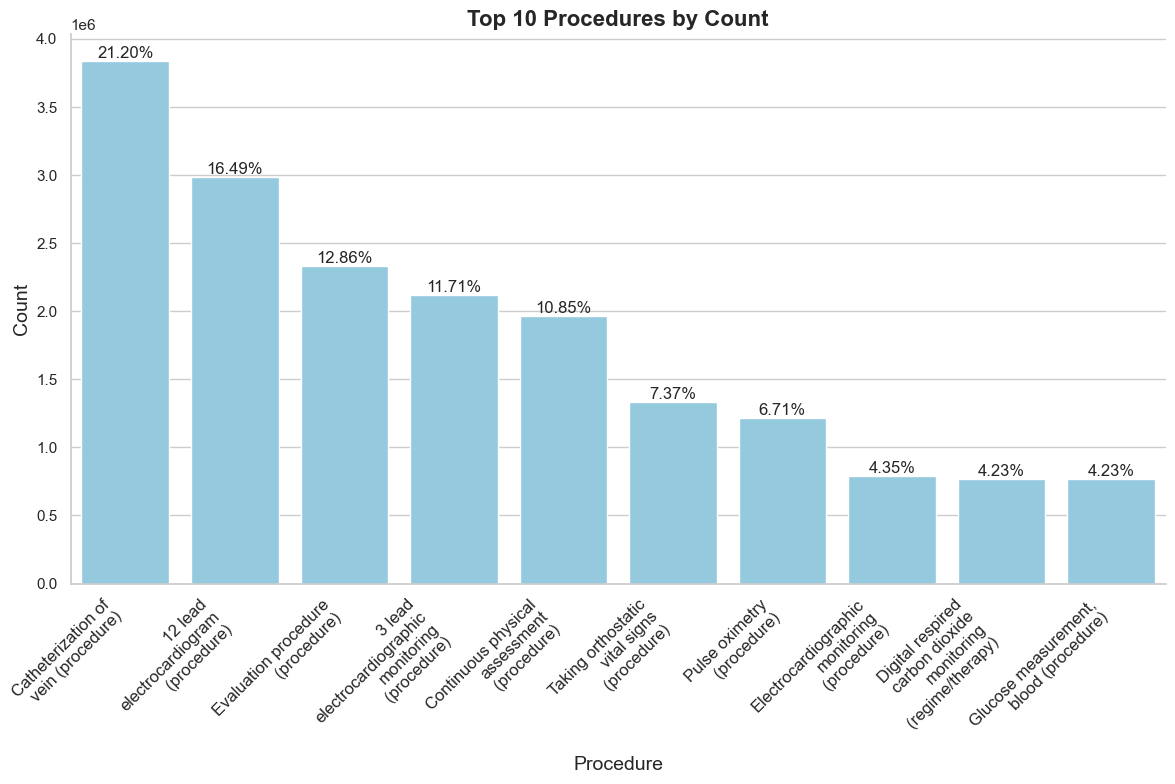

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Assuming procedures_cnt is your dictionary
procedures_df = pd.read_csv(os.path.join(root,'Statistics','procedures_count.csv'))

# Calculate the total count of all procedures
total_count = procedures_df['Count'].sum()
procedures_df['Percentage'] = (procedures_df['Count'] / total_count) * 100

#print count of bag valve mask
print(procedures_df[procedures_df['Procedure'] == 'Bag valve mask ventilation (procedure)'])

# Select top 10 procedures based on 'Count'
top_10_procedures = procedures_df.sort_values('Count', ascending=False).head(10)

# Recalculate percentages for the top 10 procedures only
top_10_total_count = top_10_procedures['Count'].sum()
top_10_procedures['Percentage'] = (top_10_procedures['Count'] / top_10_total_count) * 100

# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in top_10_procedures['Procedure']]

# Set the style and color palette
sns.set(style='whitegrid', palette='muted')

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=wrapped_labels, y=top_10_procedures['Count'], color='skyblue')

# Add labels and titles
plt.xlabel('Procedure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Procedures by Count', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add count numbers and correct percentages on top of each bar
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    percentage = top_10_procedures['Percentage'].iloc[i]
    bars.annotate(f'{percentage:.2f}%', (bar.get_x() + bar.get_width() / 2.0, height),
                  ha='center', va='bottom', fontsize=12)

# Remove the top and right spines for a cleaner look
sns.despine()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Subset of procedures

In [5]:

selected_procedures = ['Bag valve mask ventilation (procedure)', 'Cardiopulmonary resuscitation (procedure)', 'External ventricular defibrillation (procedure)', 'Automatic defibrillator procedure (procedure)' ]  # replace with actual procedure names



In [6]:
# Sort the DataFrame by the 'Procedure' column
sorted_procedures_df = procedures_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
print(len(sorted_procedures_df))
# # Find the indices of the selected procedures
# Filter the DataFrame to include only the selected procedures
# Sort the DataFrame by the 'Procedure' column
sorted_procedures_df = procedures_df.sort_values(by='Count', ascending=False).reset_index(drop=True)


# Filter the DataFrame to include only the selected procedures
filtered_df = sorted_procedures_df[sorted_procedures_df['Procedure'].isin(selected_procedures)]

# Get the indices of the selected procedures in the sorted DataFrame
indices = filtered_df.index.tolist()

print(indices)

812
[24, 39, 44, 153]


                                           Procedure   Count  Percentage
14         Cardiopulmonary resuscitation (procedure)  110991    0.433692
26            Bag valve mask ventilation (procedure)   65906    0.257525
52   External ventricular defibrillation (procedure)   56935    0.222471
112    Automatic defibrillator procedure (procedure)    2483    0.009702


/tmp/ipykernel_898731/2384747049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Percentage'] = (filtered_df['Count'] / total_count) * 100


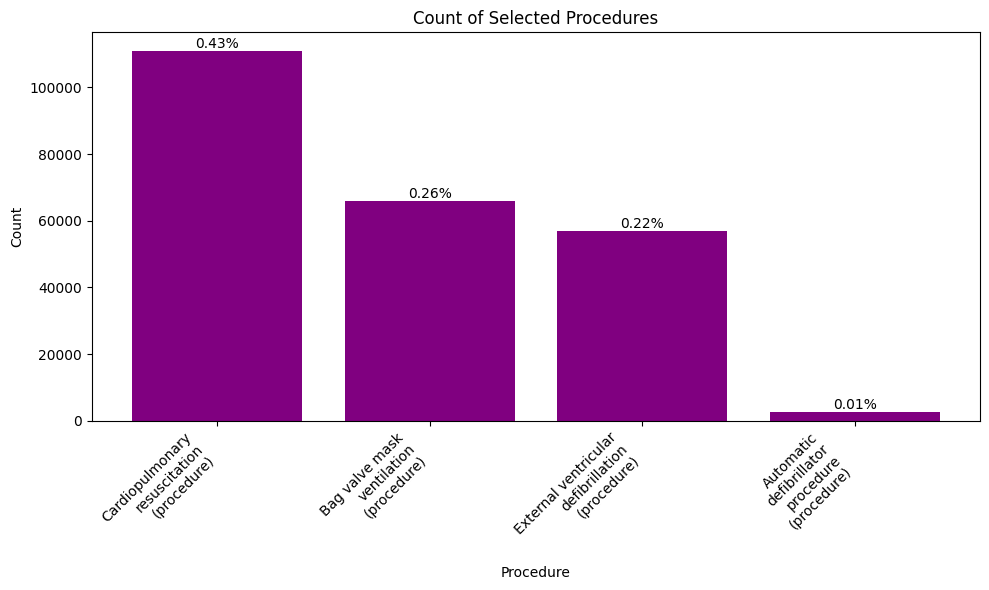

In [13]:
# Filter the DataFrame to include only the selected procedures
filtered_df = procedures_df[procedures_df['Procedure'].isin(selected_procedures)]

# Calculate the percentage for each selected procedure
filtered_df['Percentage'] = (filtered_df['Count'] / total_count) * 100

print(filtered_df)
# Function to wrap labels
def wrap_labels(label, width):
    return "\n".join(textwrap.wrap(label, width))

# Apply the wrapping function to each label
wrapped_labels = [wrap_labels(label, 20) for label in filtered_df['Procedure']]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(wrapped_labels, filtered_df['Count'], color='purple')
plt.xlabel('Procedure')
plt.ylabel('Count')
plt.title('Count of Selected Procedures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count numbers on top of each bar
for bar, percentage in zip(bars, filtered_df['Percentage']):
    height = bar.get_height()
    # plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom') #for count
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}%', ha='center', va='bottom') #for percentage


# Show the plot
plt.show()